# 11.2 COOPERATIVE BINDING DATA

Use this notebook to store your work for this problem.

## (a) Fit by eye

Im gonna lie, i could fit that line better. 1/(1+x),eq 11.9 will not work as it has the wrong shape and can only be fitted to the second half of the data. Eq 11.10 with n=3.6 and an x shift of 0.13 fits the line really, really good!


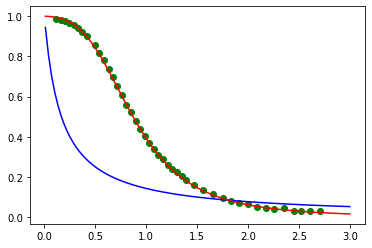

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import factorial
from numpy.random import default_rng
from scipy.signal import convolve
rand = default_rng().random

data, pos = np.loadtxt("hemoglobin.csv", delimiter = "," , unpack = True)
datax = data*10**5

x = np.linspace(0.01,3,100)
k1 = 1

k2 = 1
n = 3.6

#y1 = x**2
y1 = k1*1/(1+6*x)
y2 = k2*1/(1+(x+.13)**n)

plt.plot(datax,pos, 'o', color='green')
plt.plot(x,y1, color='blue')
plt.plot(x,y2, color='red')
#plt.loglog()




print("Im gonna lie, i could fit that line better. 1/(1+x),eq 11.9 will not work as it has the wrong shape and can only be fitted to the second half of the data. Eq 11.10 with n=3.6 and an x shift of 0.13 fits the line really, really good!")






## (b) Least-squares fit

Estimated Parameters [0.99537549 0.12077259 3.59289931]


C:\Users\KP\AppData\Local\Temp/ipykernel_24004/2306307448.py:20: RuntimeWarning: invalid value encountered in power
  return A*1/(1+(x+c)**d)


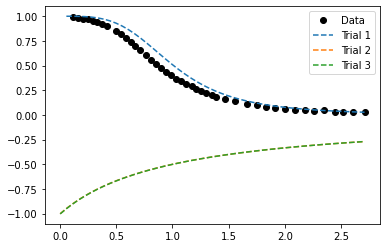

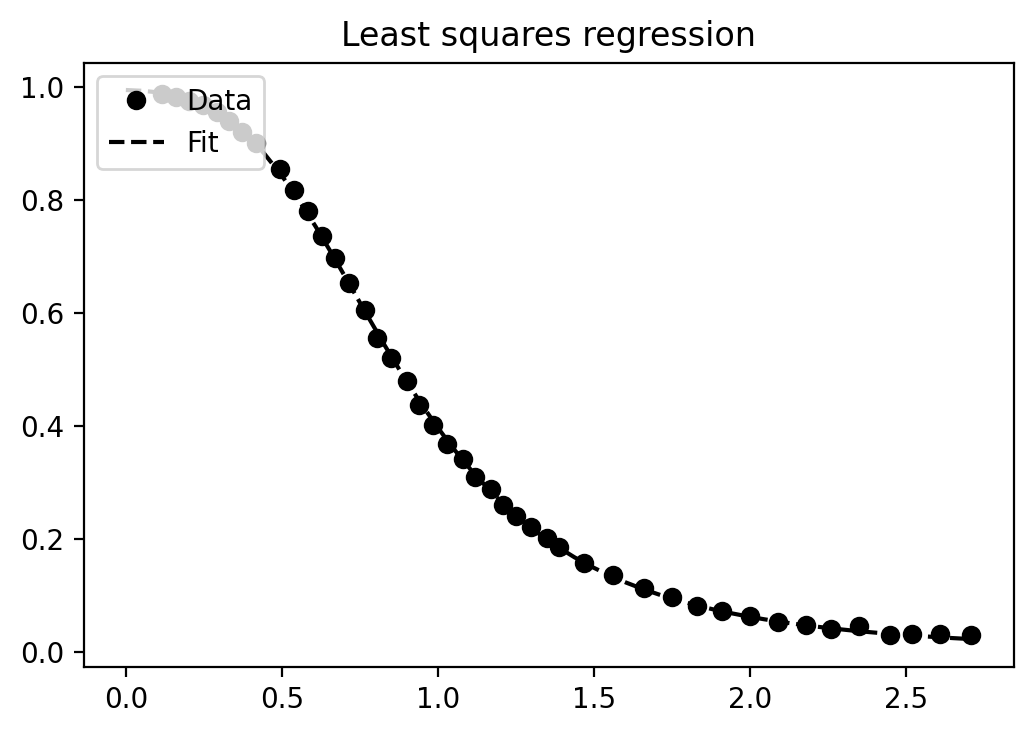

In [107]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np



C_values = np.array([0.1282, 0.2308, 0.2650, 0.3120 , 0.3547, 0.4530, 0.5556, 0.6154, 0.8932, 0.9103, 0.9316])

x_samp = datax
y_samp = pos 





def func(x, A, c, d):
    return A*1/(1+(x+c)**d)

plt.plot(x_samp, y_samp, "ko", label="Data")

x_lin = np.linspace(0, x_samp.max(), 50)                 


A, c, d = 1, -1e-2, 3.6
y_trial1 = func(x_lin,  A,     c, d)
y_trial2 = func(x_lin, -1, -1e-3, 1)
y_trial3 = func(x_lin, -1, -3e-3, 1)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()





p0 = [1, 0.13, 3.6]                                        
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  

y_model = func(x_lin, *w)


plt.figure(dpi=200)
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")









I feel happy with this


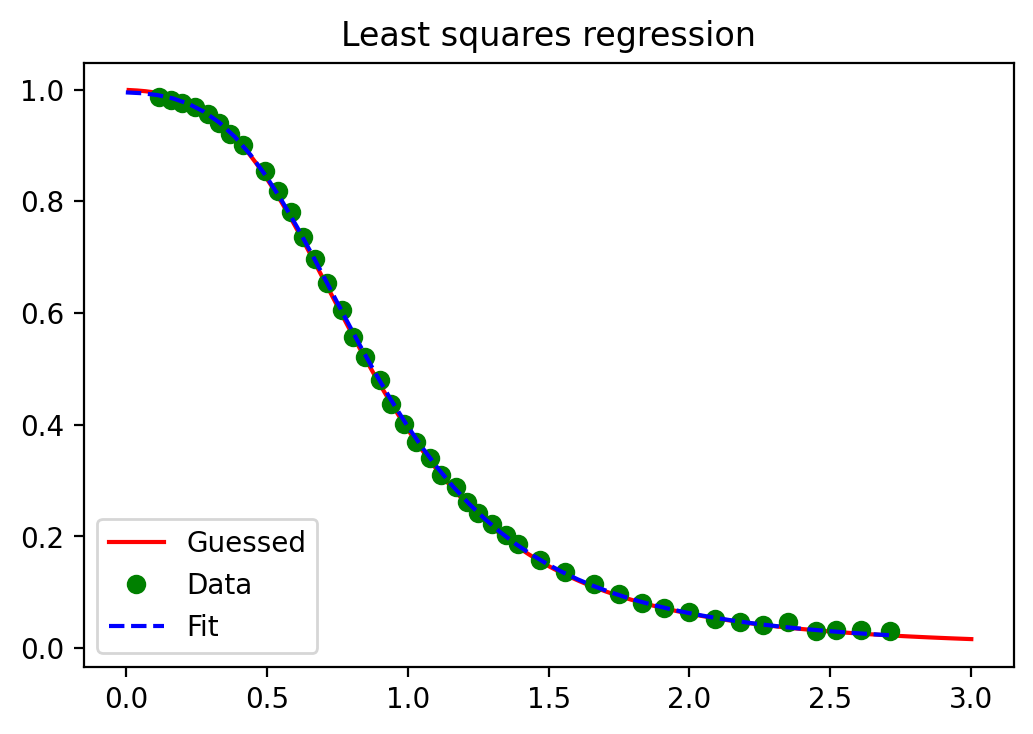

In [121]:
plt.figure(dpi=200)
plt.plot(x,y2, color='red',label="Guessed")
#plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()
plt.plot(x_samp, y_samp, "o", color='green', label="Data")
plt.plot(x_lin, y_model, "--", color='blue', label="Fit")
plt.title("Least squares regression")
plt.legend(loc="lower left")


print("I feel happy with this")